In this notebook, thousands of news article headlines were explored. We will run through some basic data analysis steps first, and then we investigate more thoroughly the headlines using natural language processing.

In [1]:
import pandas as pd
from matplotlib.pylab import *


In [2]:
data = pd.read_csv('Eluvio_DS_Challenge.csv')

In [3]:
data.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [4]:
# Take a look at descriptive data statistics of our data
data.describe(include = 'all')

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
count,5.092360e+05,509236,509236.000000,509236.0,509236,509236,509236,509236
unique,NaN,3223,NaN,NaN,500720,2,85838,1
top,NaN,2015-11-24,NaN,NaN,Brutality of Syrian Rebels Posing Dilemma in West,False,davidreiss666,worldnews
freq,NaN,458,NaN,NaN,6,508916,8897,509236
mean,1.380240e+09,NaN,112.236283,0.0,NaN,NaN,NaN,NaN
std,7.090436e+07,NaN,541.694675,0.0,NaN,NaN,NaN,NaN
min,1.201232e+09,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,1.341585e+09,NaN,1.000000,0.0,NaN,NaN,NaN,NaN
50%,1.392909e+09,NaN,5.000000,0.0,NaN,NaN,NaN,NaN
75%,1.436527e+09,NaN,16.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
# check to see if there's any missing values
data.isna().any()

time_created    False
date_created    False
up_votes        False
down_votes      False
title           False
over_18         False
author          False
category        False
dtype: bool

In [6]:
data['date_created'] = pd.to_datetime(data.date_created, format='%Y-%m-%d') # formatting date_created column

In [7]:
rcParams.update({'font.size': 15})


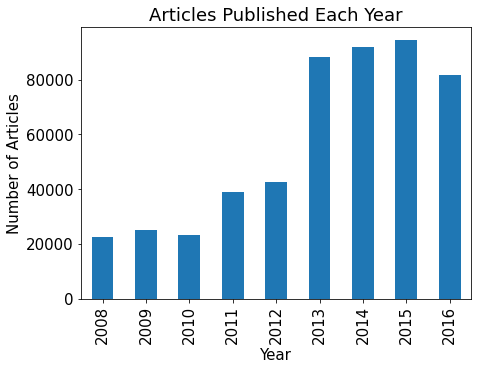

In [8]:
ax = data.groupby(data.date_created.dt.year)['title'].count().plot(kind = 'bar',figsize=(7,5))
ax.set(xlabel='Year', ylabel='Number of Articles', title='Articles Published Each Year')
plt.show()

The numbers of articles published doubled starting from 2013. This might not be the case because it could mean that more data has been collected starting from 2013.

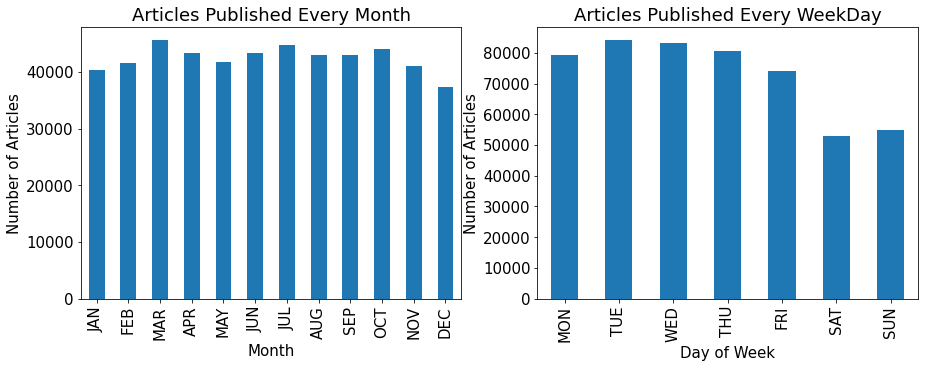

In [9]:
figure(figsize=(15,5))
subplot(1,2,1)
ax = data.groupby(data.date_created.dt.month)['title'].count().plot(kind='bar')
months = ['JAN',  'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
ax.set_xticklabels(months)
ax.set(xlabel='Month', ylabel='Number of Articles', title="Articles Published Every Month")

subplot(1,2,2)

ax = data.groupby(data.date_created.dt.weekday)['title'].count().plot(kind='bar')
days_of_week = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
ax.set_xticklabels(days_of_week)
ax.set(xlabel='Day of Week', ylabel='Number of Articles', title="Articles Published Every WeekDay")

plt.show()

Weekends have the least amount of articles published.

# What are the top words used in headline's titles? Is there a correlation between upvote and title? 
The rest of this notebook will focus on analyzing the relationship between upvotes and the titles. 

In [10]:
title_len = data['title'].str.split().str.len() # Get the title length for each entry

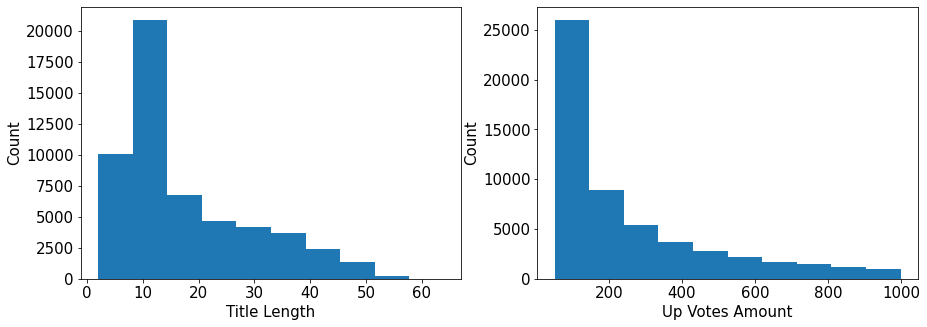

In [11]:
## Histogram plot of title length and up votes where the amount of up votes is 
# greater than 50 but less than 1000

idx = (data['up_votes']>50) & (data['up_votes'] < 1000)

# idx = title_len >50


figure(figsize=(15,5))
subplot(1,2,1)
hist(title_len[idx])
xlabel('Title Length')
ylabel('Count')
subplot(1,2,2)
hist(data['up_votes'][idx])
xlabel('Up Votes Amount')
ylabel('Count')
show()

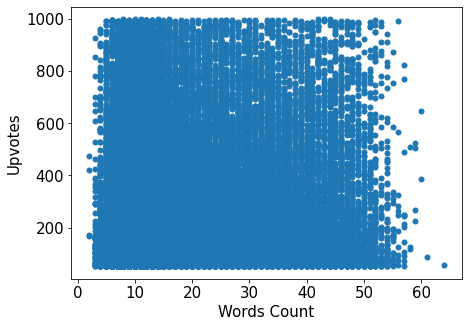

In [12]:
# Is there a relationship between the length of headlines and numbers of upvotes? 
figure(figsize=(7,5))
plot(title_len[idx], data['up_votes'][idx], 'o', markersize=5)
xlabel('Words Count')
ylabel('Upvotes')
show()

In [13]:
from scipy.stats import pearsonr

# Pearson correlation test
corr, _ = pearsonr(title_len, data['up_votes'])
print('Pearson correlation test: ', corr)

Pearson correlation test:  0.0926298425994139


There is no correlation between numbers of upvotes and title length

In [14]:
## Word cloud of the titles
import nltk
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = 200,
                    max_font_size = 100, 
                    random_state = 1,
                    width=800, 
                    height=400,
                    mask = None)
                    
wordcloud.generate(str(data['title']))

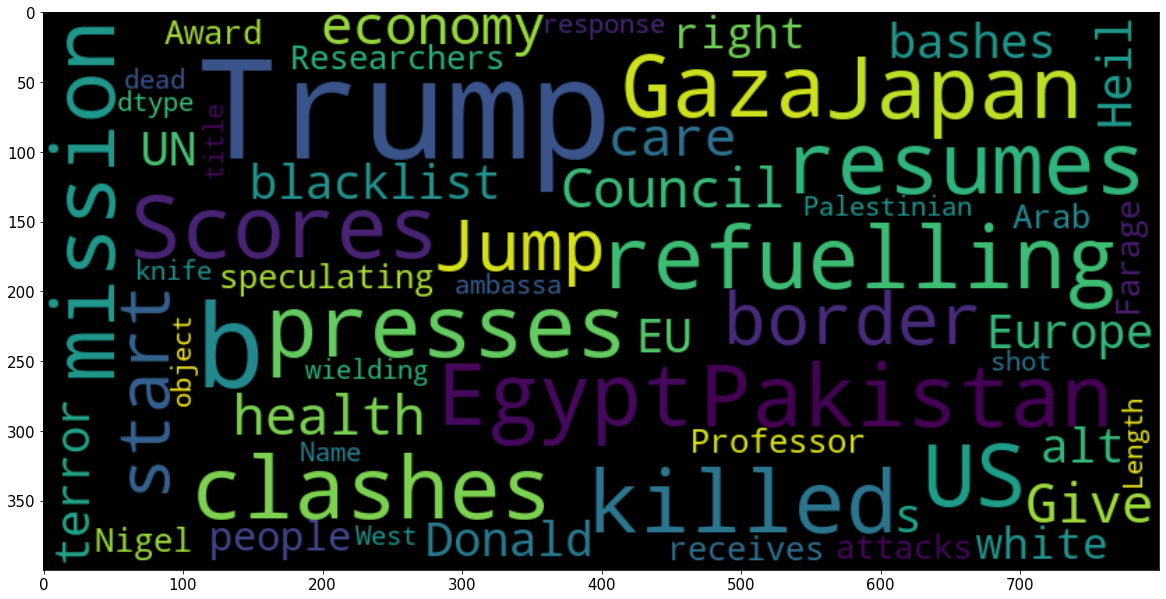

In [15]:
figure(figsize=(20,16))
plt.imshow(wordcloud, interpolation='bilinear')
show()

In [16]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

In [17]:
## Loop through each word in headlines and count how many times they appear

title_list = data['title'].str.split() 

# headlines = []

dic_stopword={}
dic_keyword ={}
for headline in title_list:
    for word in headline:
        word = word.lower()
#         headlines.append(word)
        if word in stop:
            if word in dic_stopword:
                dic_stopword[word]+=1
            else:
                dic_stopword[word] = 1
        else:
            if word in dic_keyword:
                dic_keyword[word] += 1
            else:
                dic_keyword[word] = 1


In [18]:
top_stopword=sorted(dic_stopword.items(), key=lambda x:x[1],reverse=True)[:10] # sort stopwords and plot the top 10
x_stopword,y_stopword=zip(*top_stopword)

top_word=sorted(dic_keyword.items(), key=lambda x:x[1],reverse=True)[1:11] # The first top word is a dash '-' so we excluded it. 
x_topword,y_topword=zip(*top_word)


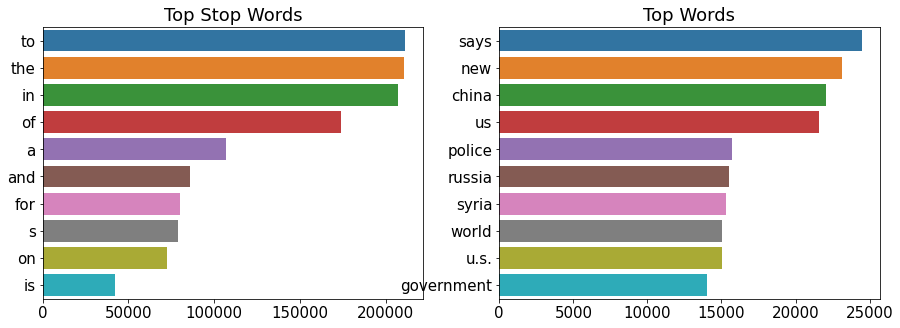

In [19]:
import seaborn as sns

figure(figsize=(15,5))
subplot(1,2,1)
sns.barplot(x=list(y_stopword),y=list(x_stopword))
title('Top Stop Words')

subplot(1,2,2)
sns.barplot(x=list(y_topword),y=list(x_topword))
title('Top Words')

show()

One interesting question to ask is whether the headlines that has one of the top words also has the most upvotes?

In [20]:
## Looping through the headlines to locate which headline has top word in it. 
idx = []
k = 0
for headline in title_list:
    for word in headline:
        word= word.lower()
        if word in x_topword:
            idx.append(k)
    k+= 1

In [21]:
data['up_votes'].iloc[idx].describe() # descriptive statistics of headline that has one of top words in it

count    181847.000000
mean        128.529187
std         574.836909
min           0.000000
25%           2.000000
50%           5.000000
75%          19.000000
max       12333.000000
Name: up_votes, dtype: float64

It looks like there's no special relationship between the top words and the numbers of up votes. The median is around 5 which is the same for the entire dataset. Now, let's look at the most frequent n-grams

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
def ngram(corpus, n):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_words = vec.transform(corpus)
    sum_words = bag_words.sum(axis=0) 
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [23]:
top_bi_grams=ngram(data['title'],n=2)
top_tri_grams=ngram(data['title'],n=3)
x_2, y_2 = map(list,zip(*top_bi_grams))
x_3,y_3 = map(list,zip(*top_tri_grams))

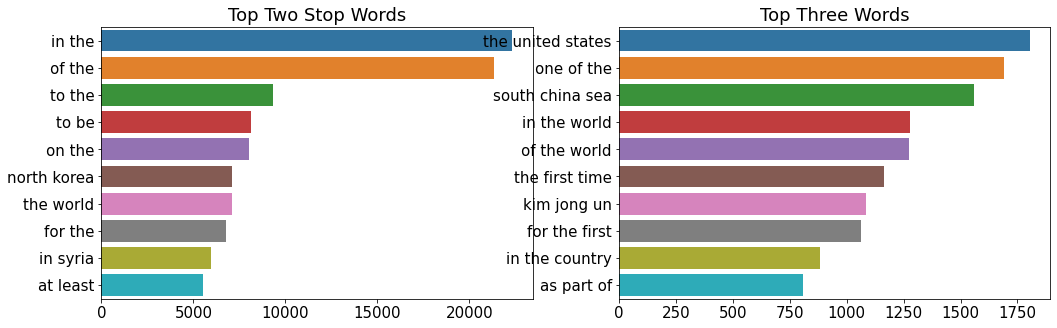

In [24]:
figure(figsize=(17,5))

subplot(1,2,1)
sns.barplot(x=y_2,y=x_2)
title('Top Two Stop Words')

subplot(1,2,2)
sns.barplot(x=y_3,y=x_3)
title('Top Three Words')

show()

Now, let's check to see if headlines with the tri and bi top words have more upvotes than other headlines. 

In [25]:
idx_top3= []
idx_no_top3 = []
k = 0
for headline in data['title']:
    headline = headline.lower()
    for top_headline in x_3:
        if top_headline in headline:
            idx_top3.append(k)
        else:
            idx_no_top3.append(k)
            break
    k+= 1

In [26]:
data['up_votes'].iloc[idx].describe()

count    181847.000000
mean        128.529187
std         574.836909
min           0.000000
25%           2.000000
50%           5.000000
75%          19.000000
max       12333.000000
Name: up_votes, dtype: float64

If we compare the above statistics with the entire dataset, we can see that headlines with the top 3 words are more likely to be upvoted. However, is this difference statistically significant? It's difficult to draw any meaningful conclusions just by looking at the mean and std of the overall dataset. Perhaps we could perform bootstrap sampling between one sample with the top 3 words and the other sample without the top 3 words.  

In [27]:
data_top3 = data['up_votes'][idx_top3] 
data_no_top3 = data['up_votes'][idx_no_top3]

In [108]:
mean_top3 = []
mean_notop3 = []
diff_mean = []
for i in range(500):
    n_random1 = np.random.randint(0, len(data_top3), size=300)
    n_random2 = np.random.randint(0, len(data_no_top3), size=300)
    
    top3_sample = data_top3.iloc[n_random1]
    notop3_sample = data_no_top3.iloc[n_random2]
    
    mean_top3.append(top3_sample.mean())
    mean_notop3.append(notop3_sample.mean())
    diff_mean.append(abs(top3_sample.mean() - notop3_sample.mean()))

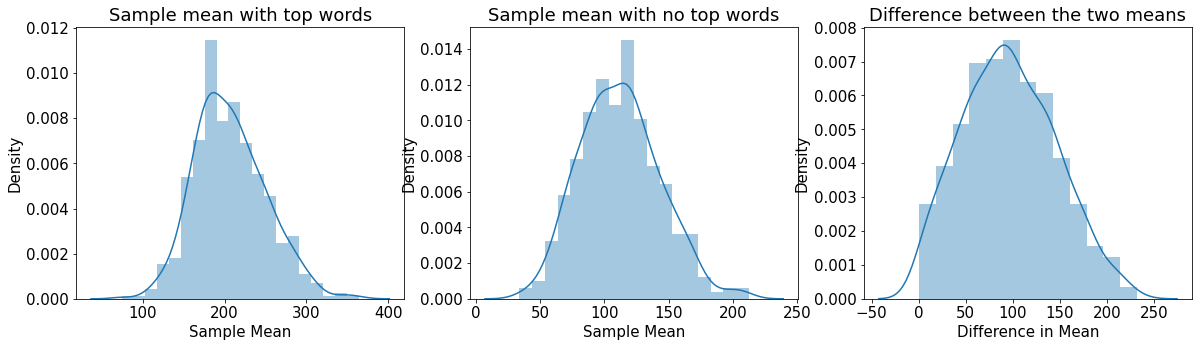

In [109]:
figure(figsize=(20,5))

subplot(1,3,1)
sns.distplot(mean_top3)
xlabel('Sample Mean')
ylabel('Density')
title('Sample mean with top words')

subplot(1,3,2)
sns.distplot(mean_notop3)
xlabel('Sample Mean')
ylabel('Density')
title('Sample mean with no top words')

subplot(1,3,3)
sns.distplot(diff_mean)
ylabel('Density')
xlabel('Difference in Mean')
title('Difference between the two means')

show()

The above figure clearly shows that there is cleary a difference in the amount of upvotes between the sample with top 3 words and sample without top 3 words. The difference is about 100 upvotes. 

So far we have explored the top words spanning a period of over 8 years. We can perform the same analysis but in a shorter period. For example, we can also find the top words in the title over a day or a week. The result would tell us what news was trending at the time. This is easy to do so we will skip it and let's do some other interesting analysis.  

# Topic Analysis

In [30]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/hal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
# Let's just analyze the topic of our data over 1 year period. 
data2010 = data[(data['date_created'] > '2010-01-1') & (data['date_created'] <= '2010-12-30')]

In [41]:
def prep_data(data):
    corpus = []
    stem=nltk.stem.PorterStemmer()
    lem=nltk.stem.WordNetLemmatizer()
    for title in data['title']:
        word_list = []
        for word in nltk.word_tokenize(title):
            if word.lower() not in stop and len(word)>2:
                word_list.append(lem.lemmatize(word))
        corpus.append(word_list)
    return corpus

corpus=prep_data(data2010)                

In [42]:
import gensim
dic = gensim.corpora.Dictionary(corpus)
bag_of_words = [dic.doc2bow(doc) for doc in corpus] # create the bag of words

In [133]:
lda_model = gensim.models.LdaMulticore(bag_of_words, 
                                   num_topics = 10, 
                                   id2word = dic)                                 
                                
lda_model.show_topics()

[(0,
  '0.005*"..." + 0.005*"Israel" + 0.004*"government" + 0.003*"police" + 0.003*"World" + 0.003*"Russia" + 0.003*"China" + 0.003*"drug" + 0.003*"Haiti" + 0.003*"Iran"'),
 (1,
  '0.009*"WikiLeaks" + 0.005*"Israeli" + 0.004*"Israel" + 0.004*"police" + 0.004*"U.S." + 0.003*"World" + 0.003*"Bank" + 0.003*"government" + 0.003*"war" + 0.003*"France"'),
 (2,
  '0.011*"Korea" + 0.009*"North" + 0.007*"Israel" + 0.006*"China" + 0.006*"South" + 0.004*"people" + 0.004*"time" + 0.003*"one" + 0.003*"war" + 0.003*"British"'),
 (3,
  '0.008*"China" + 0.005*"Wikileaks" + 0.005*"say" + 0.004*"..." + 0.004*"year" + 0.004*"Assange" + 0.003*"attack" + 0.003*"government" + 0.003*"Russian" + 0.003*"police"'),
 (4,
  '0.009*"Israel" + 0.005*"Iran" + 0.005*"Gaza" + 0.005*"year" + 0.004*"woman" + 0.004*"Pakistan" + 0.004*"people" + 0.004*"attack" + 0.004*"China" + 0.003*"want"'),
 (5,
  '0.007*"Israel" + 0.005*"Israeli" + 0.005*"world" + 0.004*"war" + 0.004*"..." + 0.004*"nuclear" + 0.004*"Iran" + 0.003*"new

In [44]:
import warnings
warnings.filterwarnings("ignore")
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bag_of_words, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.005465 -0.002291       1        1  14.085652
8     -0.004180 -0.029818       2        1  10.512851
0      0.004976 -0.027101       3        1  10.179839
1     -0.008087 -0.028822       4        1  10.160799
3      0.026897  0.012433       5        1  10.143782
6     -0.102633 -0.054900       6        1   9.919445
9      0.083094  0.001413       7        1   9.254891
5     -0.002822  0.008832       8        1   9.139960
7      0.045153 -0.005548       9        1   8.530309
4     -0.047863  0.125803      10        1   8.072473, topic_info=          Term        Freq       Total Category  logprob  loglift
13947  Assange  377.000000  377.000000  Default  30.0000  30.0000
30       China  932.000000  932.000000  Default  29.0000  29.0000
309      Korea  593.000000  593.000000  Default  28.0000  28.0000
13948   Julian  217.000000  217.000000  Default  27.0000  27.0000
293      North  527.000000  527.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
2197   Germany   35.388967  331.273914  Topic10  -6.3206   0.2802
57      people   38.889088  662.782983  Topic10  -6.2263  -0.3190
70         new   36.575558  544.856733  Topic10  -6.2876  -0.1844
61     British   34.604554  451.688893  Topic10  -6.3430  -0.0523
40     country   34.379098  633.967814  Topic10  -6.3496  -0.3978

[874 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
6          1  0.134026    ...
6          2  0.219863    ...
6          3  0.111437    ...
6          4  0.140050    ...
6          5  0.060236    ...
...      ...       ...    ...
325        7  0.130511   year
325        8  0.040058   year
325        9  0.122758   year
325       10  0.058148   year
13590      7  0.908723  yield

[2884 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 9, 1, 2, 4, 7, 10, 6, 8, 5])

We can see that Middle East countries and wars were the frequent topics in the news during 2010. We can perform the same analysis for other years. 

# Sentiment Analysis
Most of the headlines in 2010 were about war so the headlines must have been mostly negative. Let's perform sentiment analysis on 2010 to see if this is correct. 

In [53]:
from textblob import TextBlob

In [54]:
data2010['sentiment_score'] = data2010['title'].apply(lambda text: TextBlob(text).sentiment.polarity)

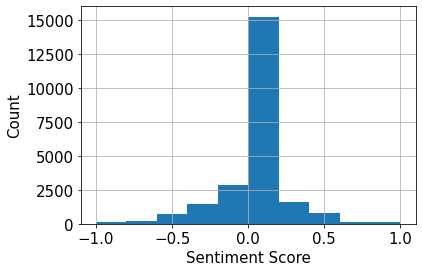

In [56]:
data2010['sentiment_score'].hist()
ylabel('Count')
xlabel('Sentiment Score')
show()

The sentiment score ranges from -1 (most negative) to 1 (most positive). Looking at the histogram figure above, we can see that most of the headlines during 2010 were neutral. One interesting question to ask if there is a relationship between sentiment score and the amount of upvotes. 

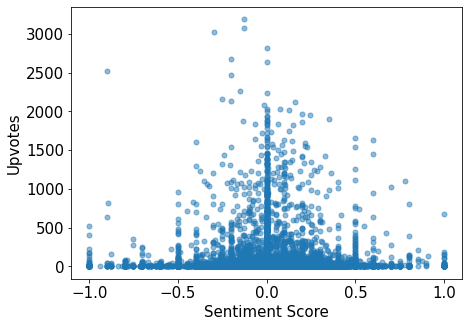

In [71]:
figure(figsize=(7,5))
plot(data2010['sentiment_score'], data2010['up_votes'], 'o', markersize=5, alpha = 0.5)
xlabel('Sentiment Score')
ylabel('Upvotes')
show()

The scatter plot doesn't show any notable relationship between sentiment score and what people tend to up vote. This plot could be highly biased because most of the news titles are marked as neutral. To avoid having bias, we can sample the same amount of data point from neutral, positive and negative news and look at their corresponding up vote amount. 

In [99]:
mean_neutral = []
mean_positive = []
mean_negative = []
len_neutral = len(data2010[data2010['sentiment_score'] == 0]) 
len_negative = len(data2010[data2010['sentiment_score'] < 0])
len_positive = len(data2010[data2010['sentiment_score'] > 0])

for i in range(500):
    random_neutral = np.random.randint(0, len_neutral, size = int(len_neutral*0.1)) # sample 10%
    random_positive = np.random.randint(0, len_positive, size = int(len_positive*0.2)) # sample 20%
    random_negative = np.random.randint(0, len_negative, size= int(len_negative*0.15)) # sample 15%
    
    mean_neutral.append(data2010['up_votes'].iloc[random_neutral].mean())
    mean_positive.append(data2010['up_votes'].iloc[random_positive].mean())
    mean_negative.append(data2010['up_votes'].iloc[random_negative].mean())


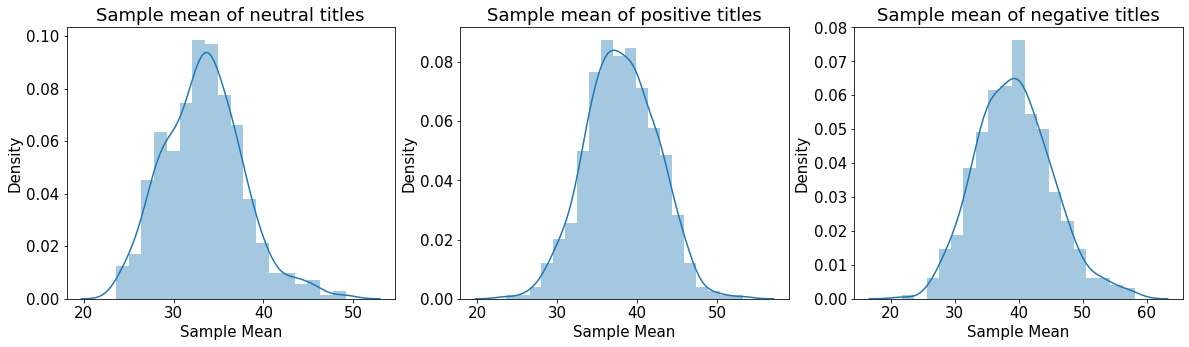

In [101]:
figure(figsize=(20,5))

subplot(1,3,1)
sns.distplot(mean_neutral)
xlabel('Sample Mean')
ylabel('Density')
title('Sample mean of neutral titles')

subplot(1,3,2)
sns.distplot(mean_positive)
xlabel('Sample Mean')
ylabel('Density')
title('Sample mean of positive titles')

subplot(1,3,3)
sns.distplot(mean_negative)
ylabel('Density')
xlabel('Sample Mean')
title('Sample mean of negative titles')

show()

It seems like they all have the same amount of up votes. Thus, we can conclude that the sentiment does not affect how the news is upvoted. 